## Prediction using supervised ML
### Simple Linear Regression

Here we use regression method to predict the marks that student are expected to score based upon the hours they spend on studying.

Import all the libraries required in this notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 Read data from remote link.

In [3]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Check whether the data has null values.

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Check the data type of each variables.

In [10]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Find the correlation between the two variables

In [4]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Find any relationship between the datas by plotting them manually.

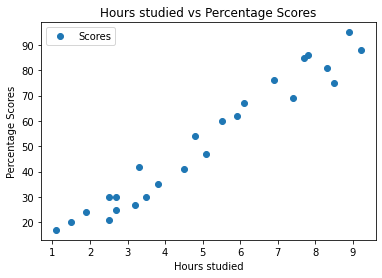

In [12]:
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.title('Hours studied vs Percentage Scores')
plt.show()

### Prepare the data by dividing them into attributes and labels.

In [13]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now we split the data into training and testing sets using Scikit-Learns built-in train_test_split() method.

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Train the algorithm
Here we create a linear regression model and train our algorithm.

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Training complete.")

Training complete.


Now we plot the regression line.

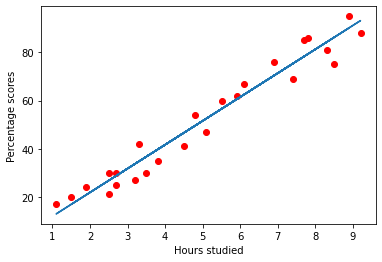

In [21]:
slope = lm.coef_
intercept = lm.intercept_
line = slope * X + intercept
plt.scatter(X,y,color='red')
plt.plot(X,line)
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
plt.show()

### Making Predictions.
Here we have to predict the scores for the test data.

In [25]:
y_pred = lm.predict(X_test)
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [27]:
df1 = pd.DataFrame({"Actual" : y_test,"Predicted" : y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing our data.

In [35]:
hours = 9.25
hours1=np.array(hours).reshape(-1,1)
pred_y =lm.predict(hours1)
print('Hours studied = {}'.format(9.25) )
print('Predicted Score = {}'.format(pred_y[0]))

Hours studied = 9.25
Predicted Score = 93.69173248737539


### Evaluating the model

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [37]:
print('Mean Absolute Error = {}'.format(MAE))
print('Root Mean Sqaured Error = {}'.format(RMSE))

Mean Absolute Error = 4.183859899002982
Root Mean Sqaured Error = 4.647447612100373


## Task Completed.